## Fooling Trained CNN

In [483]:
import tensorflow as tf
from model import ConvNet
from utils import *
import pickle
import numpy as np
import matplotlib.pyplot as plt
import random

In [488]:
tf.reset_default_graph() # reset variables 
model = ConvNet() # create my implementation of CNN
saver = tf.train.Saver() 

In [489]:
# load test data
with open('data/test_data.pkl', 'rb') as f:
    test = pickle.load(f)
with open('data/test_labels.pkl', 'rb') as f:
    label = pickle.load(f)
label = one_hot(sorted(list(set(label))), label)

In [492]:
correct_prediction = tf.equal(tf.argmax(model.pred, 1), tf.argmax(model.output, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
with tf.Session() as sess:
    # Restore variables from disk.
    saver.restore(sess, "model/model.ckpt")
    print("Model restored.")
    print("Test accuracy: {0:.2f}".format(sess.run(accuracy, feed_dict={model.input: test, model.output: label})))

INFO:tensorflow:Restoring parameters from model/model.ckpt
Model restored.
Test accuracy: 0.97


If the test accuracy is 0.97, the model is successfully restored.

In [493]:
def show_prediction(data, n = 5):
    """ Randomly select n images (default = 5) and shows the images
    as well as the true label and the model prediction
    """
    # data and labels
    img, label = data
    idx = random.sample(range(len(img)), n)
    chars = ["E", "F", "H", "I", "T"]

    # plot
    fig, axs = plt.subplots(1,n, figsize=(15, 6))
    axs = axs.ravel()

    with tf.Session() as sess:
        # Restore variables from disk.
        saver.restore(sess, "model/model.ckpt")
        for k in range(n):
            i = idx[k]
            answer = chars[np.argmax(label[i])]
            guess = chars[np.argmax(sess.run(model.pred, feed_dict={model.input: img[i].reshape(1,-1)}))]
            axs[k].set_title("label:{}, pred:{}".format(answer, guess))
            axs[k].imshow(img[i].reshape(28,28).T, cmap=plt.cm.Greys)
        plt.show()

INFO:tensorflow:Restoring parameters from model/model.ckpt


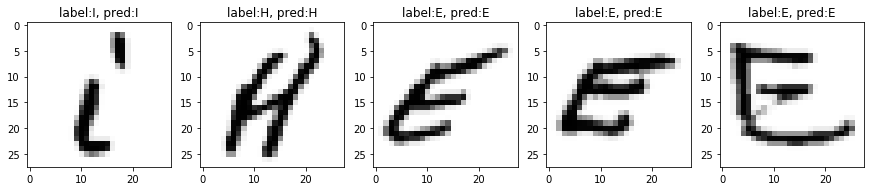

In [494]:
data = (test, label)
show_prediction(data)

### What classification does a random image get?
* EMNST labels that the model has not seen 
* Completely random noises

In [495]:
def random_emnist(data, n = 5):
    """ Randomly select n images (default = 5) and shows the images
    as well as the model prediction
    """
    img, label = data
    idx = random.sample(range(len(img)), n)
    chars = ["E", "F", "H", "I", "T"]
    fig, axs = plt.subplots(1,n, figsize=(15, 6))
    axs = axs.ravel()
    with tf.Session() as sess:
        # Restore variables from disk.
        saver.restore(sess, "model/fool/model.ckpt")
        for k in range(n):
            i = idx[k]
            guess = chars[np.argmax(sess.run(model.pred, feed_dict={model.input: img[i].reshape(1,-1)}))]
            axs[k].set_title("pred:{}".format(guess))
            axs[k].imshow(img[i].reshape(28,28).T, cmap=plt.cm.Greys)
        plt.show()

In [496]:
# load dataset from emnist classes that the model didn't train 
with open('data/random_data.pkl', 'rb') as f:
    test = pickle.load(f)
with open('data/random_labels.pkl', 'rb') as f:
    label = pickle.load(f)
label = one_hot(sorted(list(set(label))), label)

INFO:tensorflow:Restoring parameters from model/fool/model.ckpt


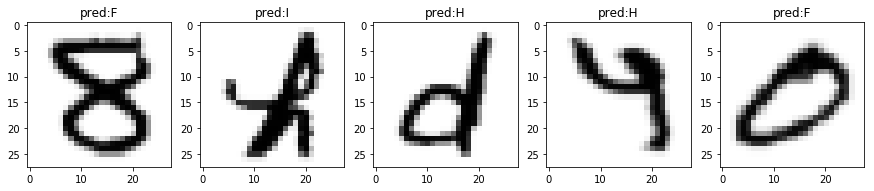

In [497]:
data = (test, label)
random_emnist(data)

In [505]:
def noise(n = 5, rand = 'random'):
    """ Generate n random gaussian noises and shows the images
    as well as the model prediction
    """
    chars = ["E", "F", "H", "I", "T"]
    fig, axs = plt.subplots(1,n, figsize=(15, 6))
    axs = axs.ravel()
    
    with tf.Session() as sess:
        # Restore variables from disk.
        saver.restore(sess, "model/fool/model.ckpt")
        for k in range(5):
            if rand == 'uniform':
                img_noise = np.random.uniform(size=(1, 784))
            elif rand == 'normal':
                img_noise = np.random.normal(size=(1, 784))
            else:
                img_noise = np.random.random(size=(1, 784))
            guess = chars[np.argmax(sess.run(model.pred, feed_dict={model.input: img_noise.reshape(1,-1)}))]
            axs[k].set_title("pred:{}".format(guess))
            axs[k].imshow(img_noise.reshape(28,28).T, cmap=plt.cm.Greys)
        plt.savefig('noise.png')
        plt.show()

INFO:tensorflow:Restoring parameters from model/fool/model.ckpt


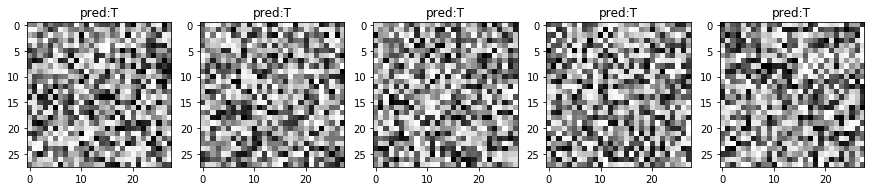

In [508]:
# uniform random values 
noise(rand = 'uniform')

INFO:tensorflow:Restoring parameters from model/fool/model.ckpt


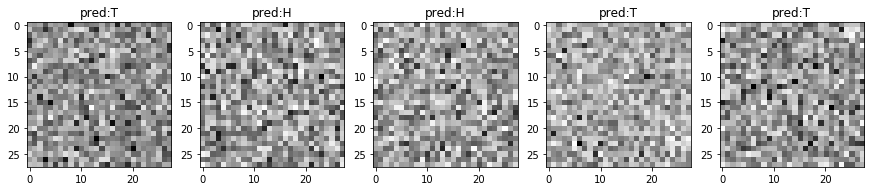

In [509]:
# gaussian random values 
noise(rand = 'normal')

### Reconstruct images using only the first two singular vectors. Is the reconstructed image still classified correctly?

In [514]:
# data is already processed so each data is reconstructed with 2 singular vectors
with open('data/test_data_s2.pkl', 'rb') as f:
    test = pickle.load(f)
with open('data/test_labels.pkl', 'rb') as f:
    label = pickle.load(f)
label = one_hot(sorted(list(set(label))), label)

correct_prediction = tf.equal(tf.argmax(model.pred, 1), tf.argmax(model.output, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
with tf.Session() as sess:
    # Restore variables from disk.
    saver.restore(sess, "model/model.ckpt")
    print("Model restored.")
    print("Test accuracy : {0:.3f}".format(sess.run(accuracy, feed_dict={model.input: test, model.output: label})))

INFO:tensorflow:Restoring parameters from model/model.ckpt
Model restored.
Test accuracy : 0.504


INFO:tensorflow:Restoring parameters from model/model.ckpt


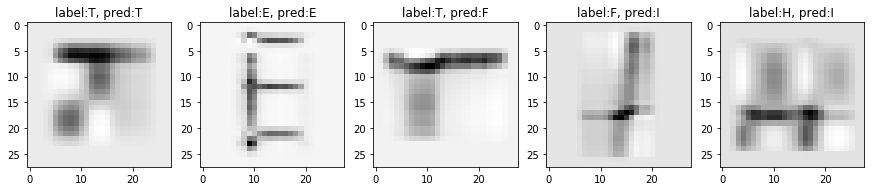

In [516]:
# show some examples
data = (test, label)
show_prediction(data)

The reconstruction quality is very poor and the model only marked 50% test accuracy.
I repeated this experiment with 5, 6, 7 singular vecotors.

In [517]:
# data is already processed so each data is reconstructed with 2 singular vectors
with open('data/test_data_s5.pkl', 'rb') as f:
    test = pickle.load(f)

correct_prediction = tf.equal(tf.argmax(model.pred, 1), tf.argmax(model.output, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
with tf.Session() as sess:
    # Restore variables from disk.
    saver.restore(sess, "model/model.ckpt")
    print("Model restored.")
    print("Test accuracy : {0:.3f}".format(sess.run(accuracy, feed_dict={model.input: test, model.output: label})))

INFO:tensorflow:Restoring parameters from model/model.ckpt
Model restored.
Test accuracy : 0.884


INFO:tensorflow:Restoring parameters from model/model.ckpt


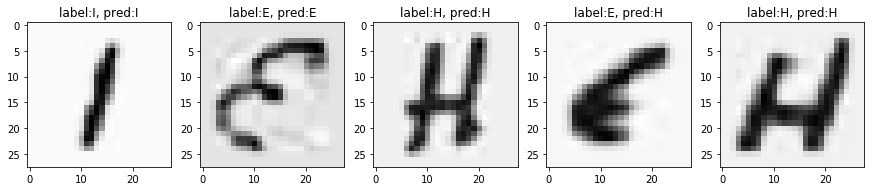

In [518]:
# show some examples
data = (test, label)
show_prediction(data)

In [519]:
# data is already processed so each data is reconstructed with 2 singular vectors
with open('data/test_data_s6.pkl', 'rb') as f:
    test = pickle.load(f)

correct_prediction = tf.equal(tf.argmax(model.pred, 1), tf.argmax(model.output, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
with tf.Session() as sess:
    # Restore variables from disk.
    saver.restore(sess, "model/model.ckpt")
    print("Model restored.")
    print("Test accuracy : {0:.3f}".format(sess.run(accuracy, feed_dict={model.input: test, model.output: label})))

INFO:tensorflow:Restoring parameters from model/model.ckpt
Model restored.
Test accuracy : 0.916


INFO:tensorflow:Restoring parameters from model/model.ckpt


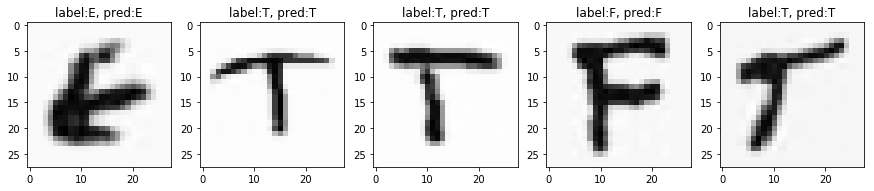

In [521]:
# show some examples
data = (test, label)
show_prediction(data)

In [520]:
# data is already processed so each data is reconstructed with 2 singular vectors
with open('data/test_data_s7.pkl', 'rb') as f:
    test = pickle.load(f)

correct_prediction = tf.equal(tf.argmax(model.pred, 1), tf.argmax(model.output, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
with tf.Session() as sess:
    # Restore variables from disk.
    saver.restore(sess, "model/model.ckpt")
    print("Model restored.")
    print("Test accuracy : {0:.3f}".format(sess.run(accuracy, feed_dict={model.input: test, model.output: label})))

INFO:tensorflow:Restoring parameters from model/model.ckpt
Model restored.
Test accuracy : 0.943


INFO:tensorflow:Restoring parameters from model/model.ckpt


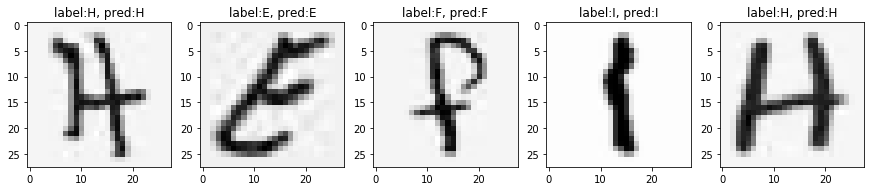

In [522]:
# show some examples
data = (test, label)
show_prediction(data)

The accuracy improves as we include more singular vectors. The accuracy exceeds 90% after including 6 singular vectors

### Try fooling the network by slightly modifying an image

INFO:tensorflow:Restoring parameters from model/model.ckpt
Model restored.


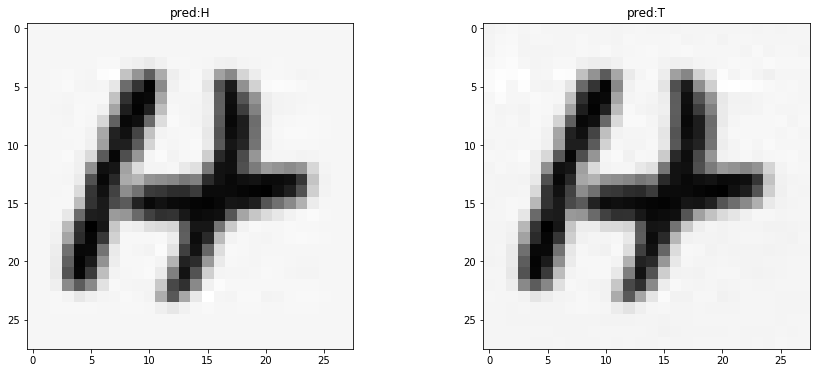

In [530]:
# reset the model
tf.reset_default_graph()
model = ConvNet()
saver = tf.train.Saver()

    
chars = ["E", "F", "H", "I", "T"] # classes
idx = 70 # base image index
target = 4 # The target class that we want to fool the model for. 4 means T
iteration = 1000 

# This is the probability that an input image maps to our target class
returned_classification = model.pred[:, target]
# store image in variable
original = test[idx]

# plot 
fig, axs = plt.subplots(1,2, figsize=(15, 6))
axs = axs.ravel()



# tensor that calculates gradient between target class and input image
gradient = tf.gradients(returned_classification, model.input)
with tf.Session() as sess:
    # initialize variable for gradient
    sess.run(tf.global_variables_initializer())
    # restore the model
    saver.restore(sess, "model/model.ckpt")
    print("Model restored.")
    
    # show original image with original prediction
    axs[0].imshow(original.reshape([28, 28]).T, cmap='Greys')
    guess = chars[np.argmax(sess.run(model.pred, feed_dict={model.input: original.reshape(1,-1)}))]
    axs[0].set_title("pred:{}".format(guess))
    
    for i in range(iteration):
        # calculates gradient
        gradients = sess.run(gradient, {model.input: original.reshape(1,-1)})
        gradients = gradients / (np.std(gradients) + 1e-8) 
        # Normalize the gradients (multiply by 1000 since the gradient is too small. Normalize later)
        norm = np.linalg.norm(1000*gradients[0]) 
        if norm == 0:
            norm = 1
        original = original + (1000*gradients[0]/norm) # add the normalized gradients to the image
    
    # show the modified image with new prediction
    axs[1].imshow(original.reshape([28, 28]).T, cmap='Greys')
    guess = chars[np.argmax(sess.run(model.pred, feed_dict={model.input: original.reshape(1,-1)}))]
    axs[1].set_title("pred:{}".format(guess))
plt.show()

Some images and classes are easier / harder to fool. Change idx, target to explore.